## How to construct and use the unityvr dataclass?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

from unityvr.preproc import logproc as lp
from unityvr.viz import viz, utils

#### Generate data object

In [2]:
dirName = 'Z:/FlyVR/FlyVR data'
fileName = 'Log_2023-05-26_15-28-47.json'
fileName

'Log_2023-05-26_15-28-47.json'

In [3]:
uvrTest = lp.constructUnityVRexperiment(dirName,fileName)
uvrTest.printMetadata()

correcting for Unity angle convention.
Metadata:

expid  :  testExp
experiment  :  test experiment
genotype  :  testGenotype
sex  :  NA
flyid  :  NA
trial  :  trial5-28-47
date  :  2023-05-26
time  :  15-28-47
ballRad  :  0.04699999839067459
setFrameRate  :  60
notes  :  NA
angle_convention  :  right-handed


#### Use of object-functions

In [4]:
frameftDf = uvrTest.downsampleftDf()
frameftDf.head()

,frame,ficTracTReadMs,ficTracTWriteMs,dx,dy,dz
0,10.0,0.0,0.0,0.003056,0.002514,0.004162
1,11.0,7.0,7.0,0.015370,0.009642,0.015787
2,12.0,21.0,21.0,0.033348,0.003748,0.022823
3,13.0,32.0,32.0,-0.038443,-0.001639,-0.000123
4,14.0,71.0,71.0,0.037815,0.003070,0.024492


#### Plot trajectory

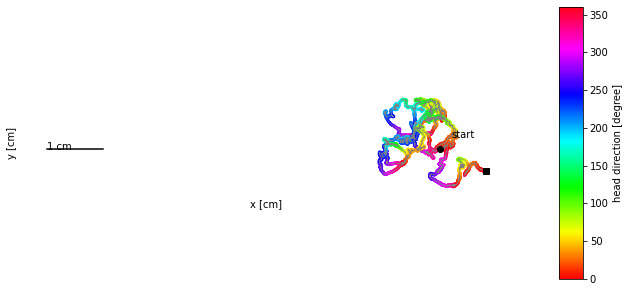

In [5]:
#conversion factor to cm
dc2cm = 10

fig, axs = viz.plotFlyPath(uvrTest, dc2cm, figsize=(10,5))
utils.pathPlotAxisTheme(axs[0],'cm')
utils.plotScaleBar(axs[0],1,(-7,0),'1 cm')

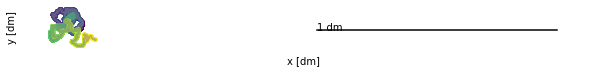

In [6]:
# Plot trajectory witth objects (all in decimeter)
fig, ax = viz.plotVRpathWithObjects(uvrTest,limx=[-np.inf, -np.inf],limy=[-np.inf, -np.inf], myfigsize=(10,10))
utils.pathPlotAxisTheme(ax,'dm')
utils.plotScaleBar(ax,1,(1,0),'1 dm')

#### Save object to file, load object from file

In [7]:
preprocDir = dirName #choose location for preprocessing (for simplicity here we use the sample directory)
savepath = uvrTest.saveData(preprocDir, uvrTest.metadata['trial'])
print(savepath)

Z:\FlyVR\FlyVR data\trial5-28-47\uvr


In [8]:
uvrTest_loaded = lp.loadUVRData(savepath)
uvrTest_loaded.printMetadata()

Metadata:

expid  :  testExp
experiment  :  test experiment
genotype  :  testGenotype
sex  :  NA
flyid  :  NA
trial  :  trial5-28-47
date  :  2023-05-26
time  :  15-28-47
ballRad  :  0.04699999839067459
setFrameRate  :  60
notes  :  NA
angle_convention  :  right-handed
